In [95]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

In [96]:
df = pd.read_csv('data/is24_89737_1530561783410.csv',
                 index_col=0,
                 encoding='utf-8',
                 engine='python')[[
    'title',
    'address_city',
    'address_quarter',
    'address_postcode',
    'address_wgs84Coordinate_latitude',
    'address_wgs84Coordinate_longitude',
    'balcony',
    'builtInKitchen',
    'calculatedPrice_marketingType',
    'calculatedPrice_priceIntervalType',
    'calculatedPrice_rentScope',
    'calculatedPrice_value',
    'energyPerformanceCertificate',
    'floorplan',
    'garden',
    'livingSpace',
    'numberOfRooms',
    'price_value',
    'privateOffer'
]]

In [97]:
df['pricePerMeterSquared'] = df.calculatedPrice_value / df.livingSpace
df['numberOfRooms'] = df.numberOfRooms.apply(lambda x: np.round(x, decimals=1))
df['wbs'] = df.title.str.contains('wbs', case=False) 

In [98]:
filtered_df = df[(df.livingSpace < 90) &
   (df.calculatedPrice_value < 900) &
   (df.address_city.str.contains('Berlin'))]
len(filtered_df[filtered_df.wbs])

69

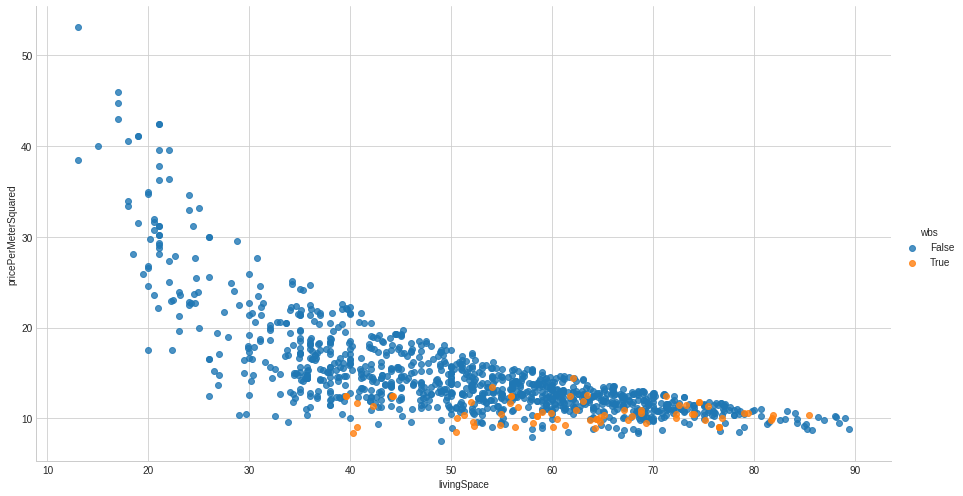

In [99]:
sns.lmplot('livingSpace',
           'pricePerMeterSquared',
           data=filtered_df,
           fit_reg=False,
           hue='wbs',
           size=7,
           aspect=1.8);

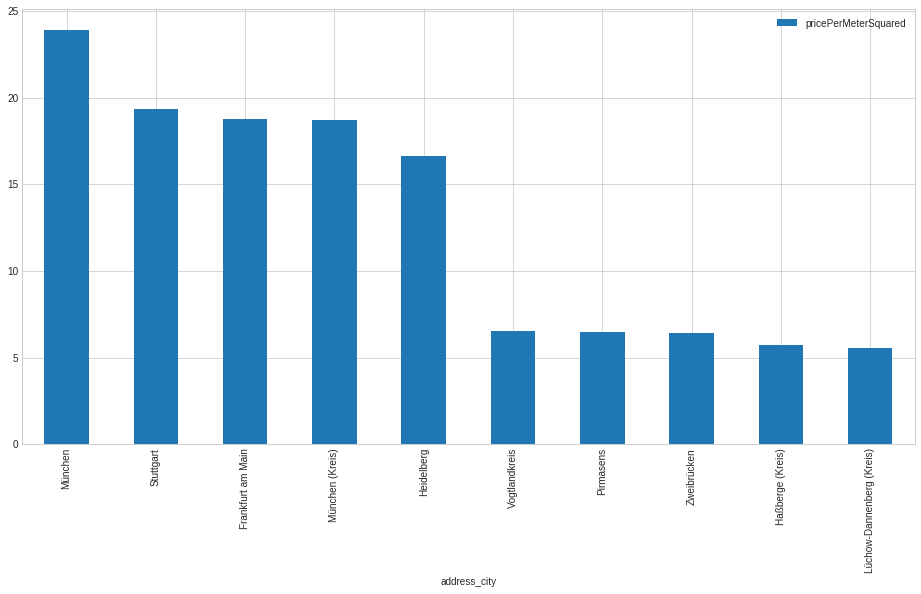

In [100]:
avg_df = df.groupby('address_city').median()
avg_df = avg_df[['pricePerMeterSquared']].sort_values(by=['pricePerMeterSquared'], ascending=False)
avg_df[:5].append(avg_df[-5:]).plot.bar(figsize=(16, 8));

In [101]:
df.head()

,title,address_city,address_quarter,address_postcode,address_wgs84Coordinate_latitude,address_wgs84Coordinate_longitude,balcony,builtInKitchen,calculatedPrice_marketingType,calculatedPrice_priceIntervalType,...,calculatedPrice_value,energyPerformanceCertificate,floorplan,garden,livingSpace,numberOfRooms,price_value,privateOffer,pricePerMeterSquared,wbs
@id,,,,,,,,,,,,,,,,,,,,,
103714113,Exklusiver Erstbezug - gründerzeitliche Altbau...,Magdeburg,Werder,39114.0,52.13008,11.65215,true,false,BUDGET_RENT,MONTH,...,1275.15,NaN,true,false,100.00,3.0,1025.15,false,12.751500,False
91645737,"++Penthouse, Fußbodenheizung, Loggia, Elbblick...",Magdeburg,Altstadt,39104.0,52.13484,11.64833,true,false,BUDGET_RENT,MONTH,...,2082.65,true,true,false,148.65,4.0,1700.00,false,14.010427,False
105292933,Dichterviertel: Sehr schöne 2-Raum-Wohnung/RES...,Erfurt,Löbervorstadt,99096.0,50.96571,11.03207,false,false,BUDGET_RENT,MONTH,...,683.00,true,true,false,63.33,2.0,538.00,false,10.784778,False
105248601,"Bes. Dienstag 03.07. um 17:30 Uhr, 3 ZIMMER mi...",Berlin,Köpenick (Köpenick),12557.0,52.43243,13.57142,true,true,BUDGET_RENT,MONTH,...,809.90,true,false,false,78.00,3.0,626.00,false,10.383333,False
105623436,"Ruhig gelegene 2 ZKB mit Balkon, Schwimmbad, F...",Bremerhaven,Wulsdorf,27572.0,53.50972,8.59401,true,true,BUDGET_RENT,MONTH,...,535.00,true,false,false,59.09,2.0,355.00,false,9.053985,False


In [102]:
berlin_df = df[(df.address_city.notnull()) & (df.address_city.str.contains('Berlin'))]
avg_berlin_df = berlin_df.groupby('address_quarter').median()
avg_berlin_df = avg_berlin_df[['pricePerMeterSquared']].sort_values(by=['pricePerMeterSquared'], ascending=False)
avg_berlin_df.rename(columns={'pricePerMeterSquared': 'pricePerMeterSquared_avg'}, inplace=True)
avg_berlin_5_5 = avg_berlin_df[:5].append(avg_berlin_df[-5:])

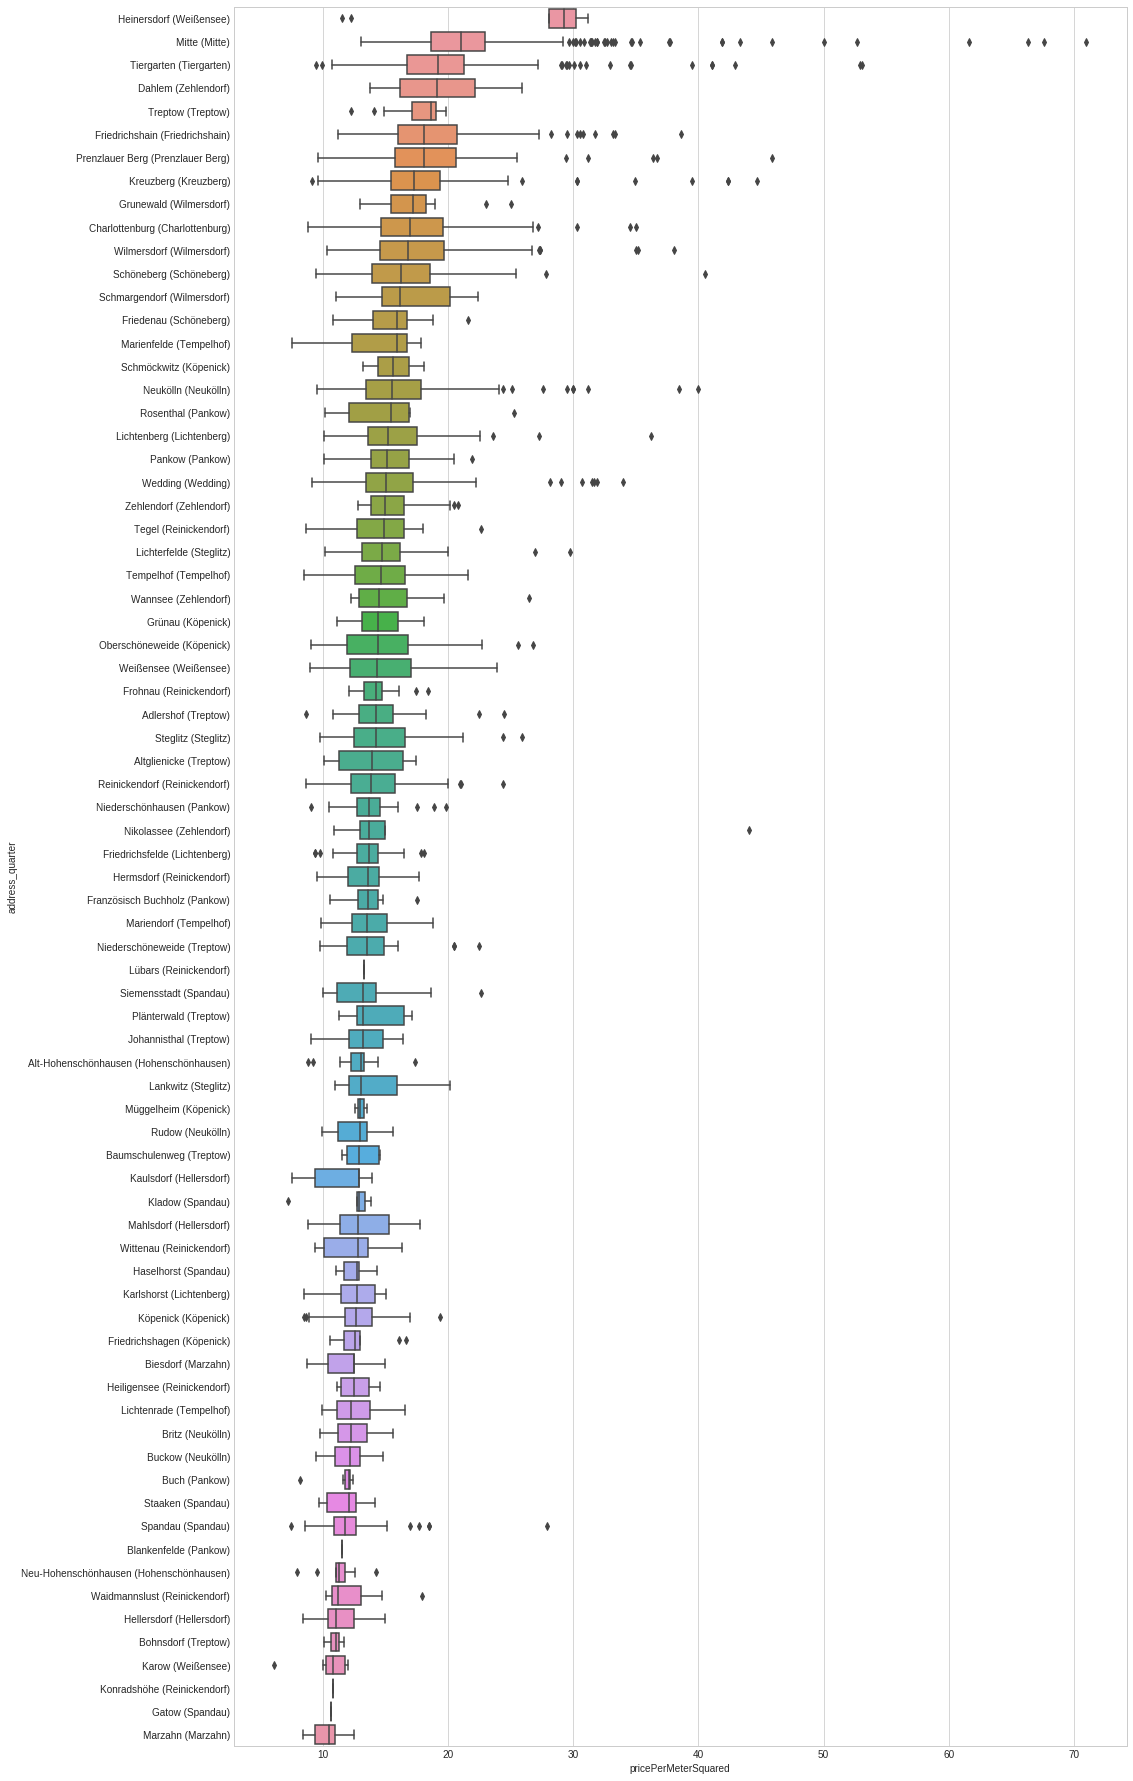

In [103]:
berlin_5_5 = berlin_df.join(avg_berlin_5_5, on='address_quarter', how='inner')
plt.figure(figsize=(16, 32))
sns_plot = sns.boxplot(x='pricePerMeterSquared',
                       y='address_quarter',
                       data=berlin_df[berlin_df.pricePerMeterSquared < 100],
                       order=avg_berlin_df.index,
                       orient='h');

In [104]:
#sns_plot.get_figure().savefig("address_querter_boxplot.png", pad_inches=0.5, bbox_inches='tight')

In [105]:
avg_berlin_df[avg_berlin_df.index.str.contains('Treptow')]

,pricePerMeterSquared_avg
address_quarter,
Treptow (Treptow),18.620690
Adlershof (Treptow),14.280952
Altglienicke (Treptow),13.888889
Niederschöneweide (Treptow),13.487424
Plänterwald (Treptow),13.187452
Johannisthal (Treptow),13.187028
Baumschulenweg (Treptow),12.891147
Bohnsdorf (Treptow),11.041176


In [106]:
berlin_df_lr = berlin_df[[
    'calculatedPrice_value',
    'balcony',
    'builtInKitchen',
    'livingSpace',
    'garden',
    'floorplan',
    'wbs',
    'numberOfRooms',
    'address_postcode'
]]
berlin_df_lr['address_postcode'] = berlin_df_lr.address_postcode.astype('int')
berlin_df_lr['balcony'] = berlin_df_lr.balcony.apply(lambda x: 1 if x == 'true' else 0)
berlin_df_lr['garden'] = berlin_df_lr.garden.apply(lambda x: 1 if x == 'true' else 0)
berlin_df_lr['floorplan'] = berlin_df_lr.floorplan.apply(lambda x: 1 if x == 'true' else 0)
berlin_df_lr['builtInKitchen'] = berlin_df_lr.builtInKitchen.apply(lambda x: 1 if x == 'true' else 0)
berlin_df_lr['wbs'] = berlin_df_lr.wbs.apply(lambda x: 1 if x else 0)
berlin_df_lr['address_postcode'] = berlin_df_lr.address_postcode.apply(lambda x: 'pc_' + str(x))
berlin_df_lr = berlin_df_lr[berlin_df_lr.calculatedPrice_value < 1500]

/home/admir/miniconda3/envs/ds/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/home/admir/miniconda3/envs/ds/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/home/admir/miniconda3/envs/ds/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [107]:
berlin_df_lr.head()

,calculatedPrice_value,balcony,builtInKitchen,livingSpace,garden,floorplan,wbs,numberOfRooms,address_postcode
@id,,,,,,,,,
105248601,809.9,1,1,78.00,0,0,0,3.0,pc_12557
98492706,615.0,0,1,21.00,0,0,0,1.0,pc_13089
104509150,1370.0,1,1,67.18,0,0,0,2.0,pc_10245
98592600,635.0,0,1,21.00,0,0,0,1.0,pc_13089
105620396,1054.0,1,1,51.20,0,1,0,2.0,pc_10557


In [108]:
dummy_postcodes = pd.get_dummies(berlin_df_lr.address_postcode)
berlin_df_with_dummies = berlin_df_lr.join(dummy_postcodes)

In [109]:
dummies_formula = ' + '.join(map(str, dummy_postcodes.columns.values))

In [110]:
import statsmodels.formula.api as sm

In [111]:
result = sm.ols(
    formula="""
                calculatedPrice_value ~
                balcony +
                builtInKitchen +
                livingSpace +
                garden +
                floorplan +
                wbs +
            """ + dummies_formula,
    data=berlin_df_with_dummies).fit()

In [112]:
berlin_df_with_dummies['fitted_price'] = result.fittedvalues.values

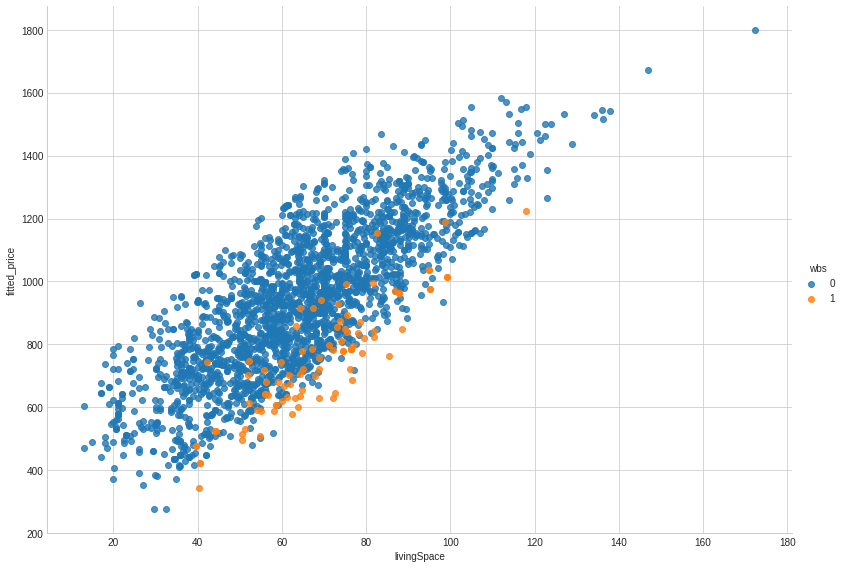

In [137]:
sns.lmplot(
    'livingSpace',
    'fitted_price',
    data=berlin_df_with_dummies,
    hue='wbs',
    fit_reg=False,
    size=8,
    aspect=1.4
);

In [134]:
balcony = 1
builtInKitchen = 0
livingSpace = 69.8
garden = 0
floorplan = 1
wbs = 0

fit_price = result.params.Intercept + \
            result.params.balcony * balcony + \
            result.params.builtInKitchen * builtInKitchen + \
            result.params.livingSpace * livingSpace + \
            result.params.garden * garden + \
            result.params.floorplan * floorplan + \
            result.params.wbs * wbs + \
            result.params.pc_12627
fit_price

792.3467175117953